In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

import networkx as nx

from graphPlot import drawGraph, setCanvas
from const import *

setCanvas()

# **Tensor Field Network** (and other ConvNet Generalisations)

*TDLS - Feb 11. 2019*

### **Chris Dryden**

- christopher.paul.dryden@gmail.com

- github.com/chrisdryden

### **Peng Cheng**

- pc175@uowmail.edu.au

- github.com/tribbloid

---

Notebook & sourcecode: [https://github.com/tribbloid/convnet-abstraction/tree/master/slide]()

## **Overview**

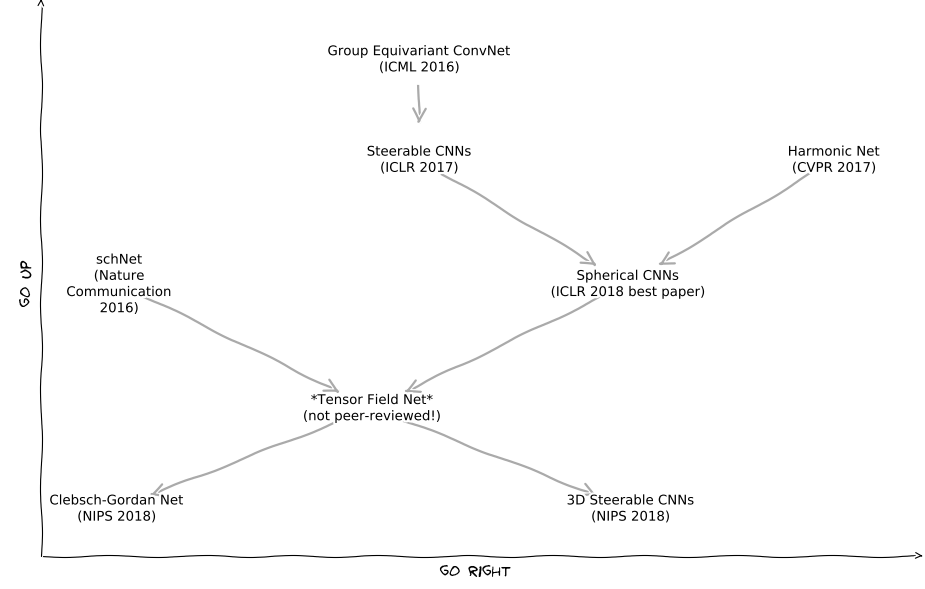

In [3]:

g = nx.DiGraph(directed=True)

schNet = "schNet\n(Nature\nCommunication\n2016)"
groupInv = "Group Equivariant ConvNet\n(ICML 2016)"
steerable = "Steerable CNNs\n(ICLR 2017)"
harmonic = "Harmonic Net\n(CVPR 2017)"
spherical = "Spherical CNNs\n(ICLR 2018 best paper)"
tensorField = "*Tensor Field Net*\n(not peer-reviewed!)"
cgNet = "Clebsch-Gordan Net\n(NIPS 2018)"
threeDSteerable = "3D Steerable CNNs\n(NIPS 2018)"

g.add_edge(schNet, tensorField)
g.add_edge(groupInv, steerable)
g.add_edge(harmonic, spherical)
g.add_edge(steerable, spherical)
g.add_edge(spherical, tensorField)
g.add_edge(tensorField, cgNet)
g.add_edge(tensorField, threeDSteerable)

drawGraph(g)

plt.show()

## Pre-ConvNet (1960-1987)

<img src="assets/winterIsComing.jpg">


## Pre-ConvNet - Linear/Fully Connected/~~Dense/Perceptron~~ Layer

In pursuing of unbounded representation/approximation power

---

\begin{align}
& f_+(y) = \Phi \Big( f(x) \Big) &= \phi \Big( \sum_{x \in \text{domain}} f(x) w(x, y) \Big) \\
& &= \phi \Big( \bbox[yellow]{< f(x), w(x, y) >_x} \Big)
\end{align}

($w$ are weight of neurons)

## Pre-ConvNet - Linear/Fully Connected Layer


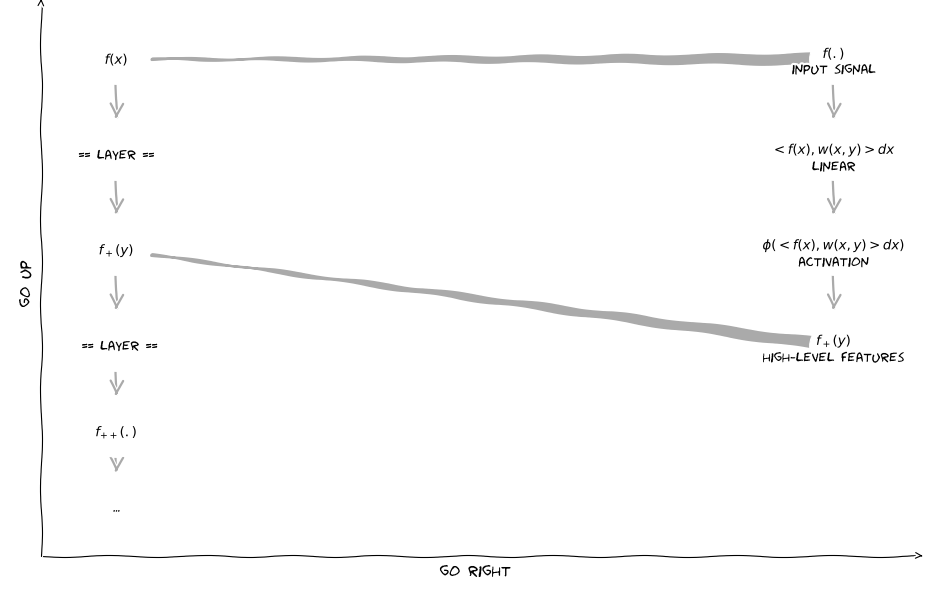

In [4]:


g = nx.DiGraph(directed=True)

g.add_edge("$f(x)$", "== layer ==")
g.add_edge("== layer ==", "$f_+(y)$")
g.add_edge("$f_+(y)$", " == layer ==")
g.add_edge(" == layer ==", "$f_{++}(.)$")
g.add_edge("$f_{++}(.)$", "...")

dot = "$f(.)$\ninput signal"
fc = "$<f(x), w(x, y)> d x$\nlinear"
nl = "$\phi(<f(x), w(x, y)> d x)$\nactivation"
dot2 = "$f_+(y)$\nhigh-level features"
# hw = "highway?"

g.add_edge(dot, fc)
g.add_edge(fc, nl)
g.add_edge(nl, dot2)

g2 = g.copy()

g2.add_edge(dot, "$f(x)$", wedge=True)
g2.add_edge(dot2, "$f_+(y)$", wedge=True)

drawGraph(g2, g, font_family='humor sans')

plt.show()

## Pre-ConvNet - Linear/Fully Connected Layer

<img src="assets/kardashian-counterexample.png" style="height: 400px;">

---
 
[*] Image courtesy https://www.quora.com/What-is-the-difference-between-equivariance-and-invariance-in-Convolution-neural-networks

## Invariant Layer / Bag-of-words?

- Don't do this

<img src="assets/picassoEffect.jpg">

---

[*] Image Courtesy: https://www.amazon.ca/Pablo-Art-Masters-Julie-Birmant/dp/1906838941


## Data Augmentation

- Good catch

<img src="assets/data-aug.png">


## Data Augmentation

- Too slow in practice
    - In **convex case** SGD "theoretically probably" converges equally fast
    - otherwise it "kind of works" but with much less efficiency

--- 

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/image-pan.gif" style="height: 400px;"> |
| :---: |
| 2D translation |


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/human-0g.jpg"> |
| :---: |
| 2D translation x 1D rotation, no gravity |


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/drone-overhead.png" style="height: 400px;"> |
| :---: |
| 2D translation $\times$ 1D rotation, gravity perpendicular to domain |


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/fisheye-pan.gif" style="height: 400px;"> |
| :---: |
| 3D rotation


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/airr.png" style="height: 400px;"> |
| :---: |
| 4D affine transformations |

---

[*] Image Courtesy: AIRR https://thedroneracingleague.com/airr/

## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/point-cloud-6d.gif" style="height: 400px;"> |
| :---: |
| 3D translation $\times$ 3D rotation |


## Data Augmentation

- Time & space complexity increase exponentially with the dimensionality of augmentation

| <img src="assets/IAS-vs-TAS.jpg" style="height: 400px;"> |
| :---: |
| Air pressure depending on translation |


## Data Augmentation

How about a better idea?

- Instead of augmenting, we hard-bake such prior knowledge into the network to yield identical result!

| <img src="assets/aerial-g-conv.jpg" style="height: 200px;"> |
| --- |


Augmentation types | Answer
 --- | --- 
2d translation | ConvNet
**others** | **G-ConvNet**
- 2d translation + 90$^{\circ}$ rotation | Group Equivariant CNNs
- 2d translation + rotation | Harmonic Net
- 3d rotation | Spherical CNNs
- 3d translation + rotation | Tensor Field Net
